# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [29]:
medical.shape

(1338, 8)

In [30]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [31]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [32]:
#calculate the mean of the medical charges
charge_mean = medical['charges'].mean()
print(charge_mean)


13270.422265141257


In [33]:
#calculate the std deviation of medical charges
charge_std = medical['charges'].std()
print(charge_std)

12110.011236693994


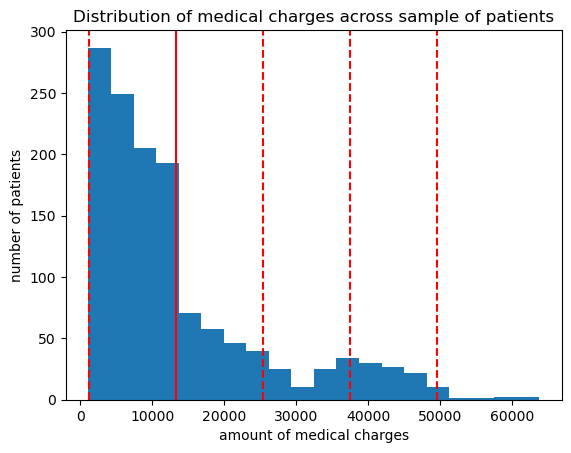

In [34]:
#histogram plot of charges
_ = medical['charges'].plot.hist(bins=20)
_ = plt.title('Distribution of medical charges across sample of patients')
_ = plt.xlabel('amount of medical charges')
_ = plt.ylabel('number of patients')
_ = plt.axvline(charge_mean, color='r')
_ = plt.axvline(charge_mean - charge_std, color='r', linestyle='--')
_ = plt.axvline(charge_mean + charge_std, color='r', linestyle='--')
_ = plt.axvline(charge_mean + charge_std*2, color='r', linestyle='--')
_ = plt.axvline(charge_mean + charge_std*3, color='r', linestyle='--')
plt.show()

This histogram is positively skewed to the right.  In order to leverage the CLT, we will need to pull multiple samples and derive the means of the bootstrap resamples.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  Because the CLT tells us that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the original population's distribution, we can still use the distribution of sample means to determine our confidence intervals and hypothesis testing.  In this case, our null hypothesis would be that average charges are >= $12,000. Lastly, because we know the population standard deviation, we should leverage the t-statistic in deriving our confidence intervals. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ As we are testing whether or not the true average is below 12,000, we will leverage a one sided interval test.

In [35]:
#calculate the margin of error based on t-critical value
n=len(medical)
confidence_level = 0.95
t_critical = t.ppf(q=0.95, df=1337)

margin_of_error_t = t_critical * (charge_std / np.sqrt(n))
confidence_interval_upper_bound = charge_mean + margin_of_error_t

print("the t-critical value is: ", t_critical)
print("The margine of error for this confidence interval is: ", margin_of_error_t)
print("Therfore there is a 95% chance that the population mean falls below: ", round(confidence_interval_upper_bound,2))


the t-critical value is:  1.6459941145571317
The margine of error for this confidence interval is:  544.9350813250251
Therfore there is a 95% chance that the population mean falls below:  13815.36


In [41]:
#calculate the probability that the average is at least 12000 using the inverse of the survivor function
prob = norm.cdf(12000, loc=charge_mean, scale=charge_std)
print("The probability that the true mean is less than or equal to 12,000 is: ", prob)

The probability that the true mean is less than or equal to 12,000 is:  0.4582248901357676


Since the probability that the true mean is less than 12,000 is approximately 45.8% there is still the potential for the administrator's concerns to be true.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  The null hypothesis is that there is no difference in the amount charged to those with insurance and those without insurance.  The alternative hypothesis is that there is statistically significant difference in charges between those with and without insurance.  

We would assume that the variances of the two groups are approximately the same and that they are normally distributed, given the CLT.  We would also assume that the samples are random.  We will continue to leverage a confidence level of 95%, and an alpha of 0.05%.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [42]:
# break the medical dataframe into 2, one df for insured patients and another for non-insured patients
insured = medical[medical['insuranceclaim']==1]
not_insured = medical[medical['insuranceclaim']==0]

In [45]:
#Calculate key inputs for insured patients charges
insured_charge_mean = insured['charges'].mean()
insured_charge_std = insured['charges'].std()
insured_n = len(insured)
print("The mean charge for insured patients is: ", insured_charge_mean)
print("The standard deviation for charges to insured patients is: ", insured_charge_std)
print("The number of claims for insured patients is: ", insured_n)

The mean charge for insured patients is:  16423.928276537677
The standard deviation for charges to insured patients is:  14045.928418802127
The number of claims for insured patients is:  783


In [46]:
#Calculate key inputs for non-insured patients charges
not_insured_charge_mean = not_insured['charges'].mean()
not_insured_charge_std = not_insured['charges'].std()
not_insured_n = len(not_insured)
print("The mean charge for uninsured patients is: ", not_insured_charge_mean)
print("The standard deviation for charges to uninsured patients is: ", not_insured_charge_std)
print("The number of claims for uninsured patients is: ", not_insured_n)

The mean charge for uninsured patients is:  8821.421892306305
The standard deviation for charges to uninsured patients is:  6446.510126811736
The number of claims for uninsured patients is:  555


In [58]:
#calculate the pooled standard deviation for the two samples
std_pooled = np.sqrt(((insured_n-1)*insured_charge_std**2 + (not_insured_n-1)*not_insured_charge_std**2) / (insured_n + not_insured_n - 2))
print("The pooled standard deviation is: ", std_pooled)
#calculate the t-statistic
t_manual = (insured_charge_mean - not_insured_charge_mean) / (np.sqrt((1/insured_n + 1/not_insured_n)) * std_pooled)
print("The t-statistic is: ", t_manual)

The pooled standard deviation is:  11520.034268775256
The t-statistic is:  11.893299030876715


In [66]:
# calculate p-value
dof_pooled = (insured_n + not_insured_n -2)
p_value_manual = 2 * (1 - t.cdf(np.abs(t_manual), df=dof_pooled))
print("p-value is: ", p_value_manual)


p-value is:  0.0


In [68]:
#calculate the p-value using ttest
ttest_ind(insured['charges'], not_insured['charges'])

TtestResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)

A:  I got the same result doing a manual calculation vs using the ttest_ind function in scipy.  The p-value is extremely low, meaning we would have to reject the null hypothesis that there is no difference between the average charges for patients with medical insurance vs those who do not have medical insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  We could leverage the norm.sf (survival function) function to obtain our p-value when performing hypothesis testing with a z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test